In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
    

In [2]:
def heatMap(a1):
    #indexing in a variable for the dataset
    b=a1.index
    #selecting those columns which have only numeric value
    a=a1._get_numeric_data()
    
    try:
        cpm=[]
        for i in range(0,len(a.columns)):
                colsum=a.iloc[:,i].sum()

                c1=(a.iloc[:,i]/colsum)*10**6
                cpm.append(c1)
    
    except:
        print("ignore error")
    #converting cpm lists into array
    cpm=np.array(cpm)
    #converting cpm value into log value of base 2
    logv=np.log2(cpm+1) #cpm+1 is a call of psuedo count which helps avoiding to get infinite values
    import scipy.stats as st
    #calculating zscore value of logcpm
    zscr=st.zscore(logv)
    
    zscr=pd.DataFrame(zscr)
    new=zscr.T
    #fill null value with zero
    zscr=new.fillna(0)
    #converting scroe into array
    zscr=zscr.values
    #heatmap plot for zscore
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.heatmap(zscr[0:10],xticklabels=a1.columns, yticklabels=b[0:10],annot=False,cmap='gnuplot')
    plt.savefig("map.pdf")

In [3]:
data=pd.read_csv('GSE145011_A549_WT_KO_readcounts.txt.gz',sep="\t")

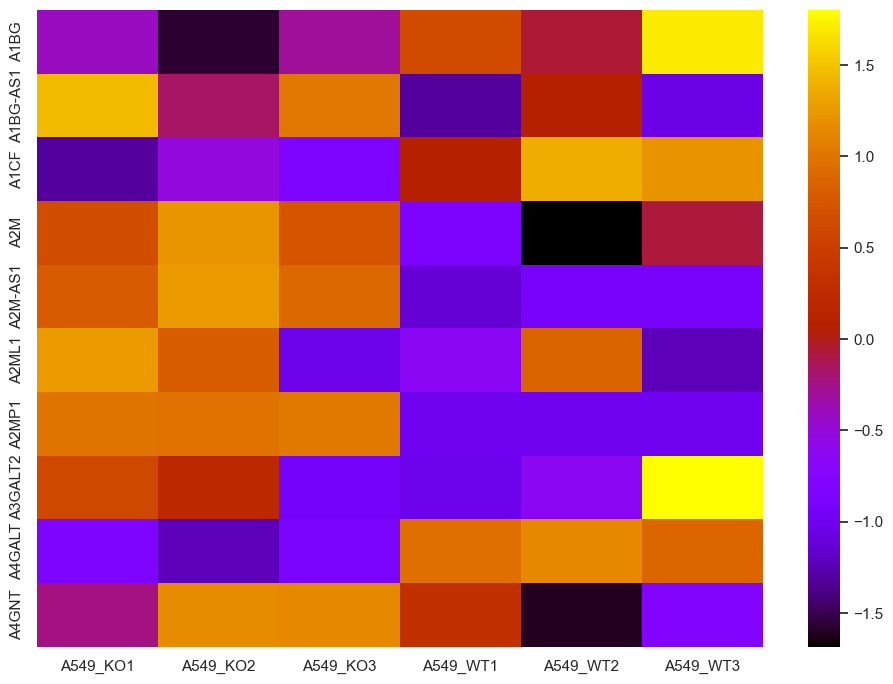

In [4]:
heatMap(data)